In [9]:
# 데이터 생성 및 연산을 위한 라이브러리
import numpy as np

# 데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 3D 시각화
from matplotlib import cm # 컬러맵

# 가우시안 혼합 모델을 위한 라이브러리
from sklearn.mixture import GaussianMixture

# 스타일 설정
plt.style.use('seaborn-v0_8-whitegrid')

print("라이브러리 임포트 완료")

라이브러리 임포트 완료


In [10]:
import numpy as np

def generate_3d_cubic_data(n_samples=150, noise=5.0):
    """
    3차원 Twisted cubic 데이터를 생성하는 함수

    Args:
        n_samples (int): 생성할 샘플의 개수
        noise (float): 데이터에 추가할 노이즈의 강도

    Returns:
        np.ndarray: 생성된 (n_samples, 3) 모양의 데이터 배열
    """
    t = np.linspace(-5, 5, n_samples)
    x = t
    y = t**2
    z = t**3

    # 데이터를 (n_samples, 3) 형태로 결합
    data = np.vstack([x, y, z]).T

    # 노이즈 추가 (현재는 0으로 설정)
    if noise > 0:
        data += np.random.normal(scale=noise, size=data.shape)

    return data

# 데이터 생성
data_3d = generate_3d_cubic_data()
print(f"데이터 생성 완료: {data_3d.shape} 형태")

데이터 생성 완료: (150, 3) 형태


In [11]:
import numpy as np
from sklearn.mixture import GaussianMixture

def find_best_gmm(data, max_components=15):
    """
    AIC와 BIC를 사용하여 최적의 GMM을 찾는 함수

    Args:
        data (np.ndarray): 분석할 데이터
        max_components (int): 테스트할 최대 컴포넌트 개수

    Returns:
        tuple: (최적 GMM 모델, AIC 점수 리스트, BIC 점수 리스트)
    """
    n_components_range = np.arange(1, max_components + 1)
    aics = []
    bics = []

    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, random_state=0)
        gmm.fit(data)
        aics.append(gmm.aic(data))
        bics.append(gmm.bic(data))

    # BIC가 가장 낮은 모델을 최적 모델로 선택
    best_bic_idx = np.argmin(bics)
    best_n_components = n_components_range[best_bic_idx]
    best_gmm = GaussianMixture(n_components=best_n_components, random_state=0)
    best_gmm.fit(data)

    return best_gmm, aics, bics

print("GMM 분석 모듈 (find_best_gmm 함수) 정의 완료")

GMM 분석 모듈 (find_best_gmm 함수) 정의 완료


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def plot_results(data, gmm_model, aics, bics):
    """
    GMM 실험 결과를 시각화하는 함수

    Args:
        data (np.ndarray): 원본 데이터
        gmm_model (GaussianMixture): 학습된 최적 GMM 모델
        aics (list): AIC 점수 리스트
        bics (list): BIC 점수 리스트
    """
    fig = plt.figure(figsize=(18, 6))

    # 1. 원본 데이터 3D 시각화
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.scatter(data[:, 0], data[:, 1], data[:, 2], c=data[:, 0], cmap='viridis', s=20)
    ax1.set_title('Original 3D Data') # 원본 3D 데이터
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')

    # 2. AIC / BIC 점수 그래프
    ax2 = fig.add_subplot(132)
    n_components_range = np.arange(1, len(aics) + 1)
    ax2.plot(n_components_range, aics, marker='o', label='AIC')
    ax2.plot(n_components_range, bics, marker='x', label='BIC')
    ax2.set_title('AIC/BIC Scores') # AIC/BIC 점수
    ax2.set_xlabel('Number of Components') # 컴포넌트 개수
    ax2.set_ylabel('Score') # 점수
    # BIC가 가장 낮은 지점에 세로선 추가
    ax2.axvline(gmm_model.n_components, linestyle='--', color='r', label=f'Best (BIC): {gmm_model.n_components}')
    ax2.legend()

    # 3. GMM 클러스터링 결과 3D 시각화
    labels = gmm_model.predict(data)
    ax3 = fig.add_subplot(133, projection='3d')
    ax3.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis', s=20)
    ax3.set_title('GMM Clustering Result') # GMM 클러스터링 결과
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('Z')

    plt.tight_layout()
    plt.savefig('gmm_3d_experiment_results.png')
    plt.show()

print("시각화 모듈 (plot_results 함수) 정의 완료")

시각화 모듈 (plot_results 함수) 정의 완료


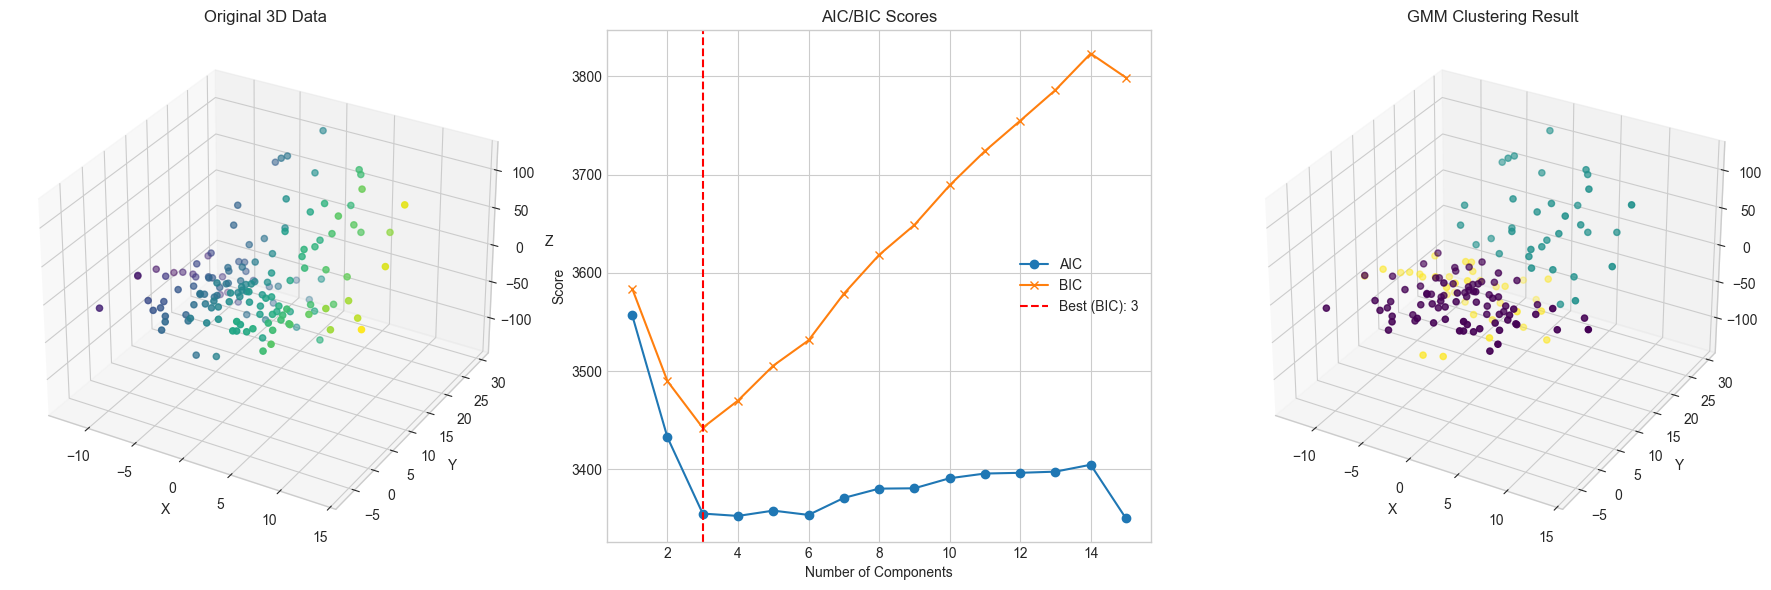

In [13]:
# === 메인 실행 로직 ===
# 1. 데이터 생성
dataset = generate_3d_cubic_data(n_samples=150)

# 2. 최적 GMM 탐색
best_model, model_aics, model_bics = find_best_gmm(dataset, max_components=15)

# 3. 결과 시각화
plot_results(dataset, best_model, model_aics, model_bics)

--- XY 평면에 대한 책임도(Responsibility) 맵 생성 중... ---


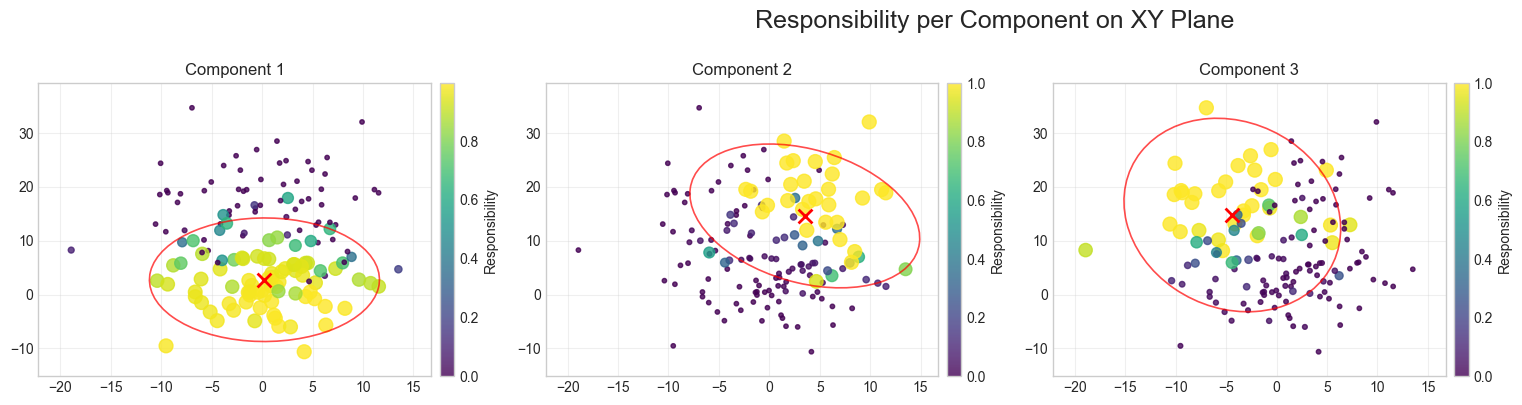

--- XZ 평면에 대한 책임도(Responsibility) 맵 생성 중... ---


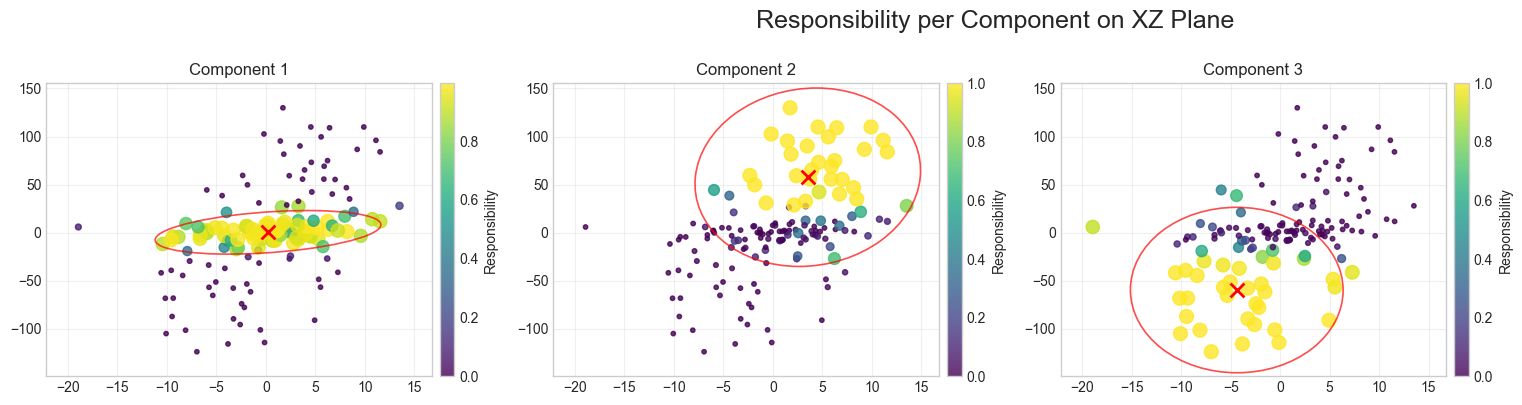

--- YZ 평면에 대한 책임도(Responsibility) 맵 생성 중... ---


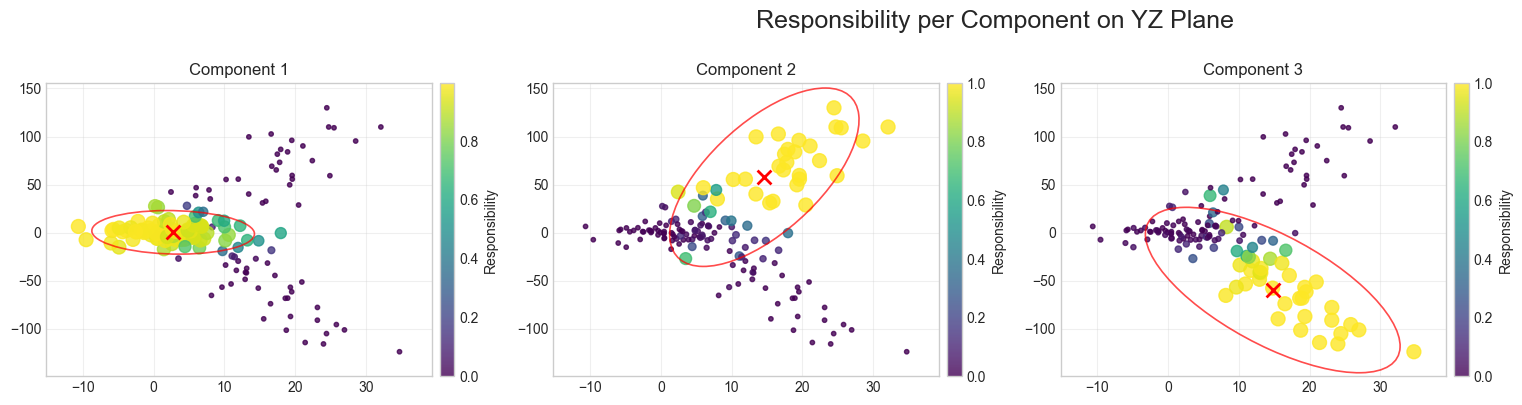

In [14]:
from matplotlib.patches import Ellipse
import math

# --- 2. 헬퍼 함수 (Helper Functions) ---
def marginalize_gmm(gmm, dims):
    """3D GMM을 2D로 투영(Marginalize)합니다."""
    means_2d = gmm.means_[:, dims]
    covariances_2d = gmm.covariances_[:, dims, :][:, :, dims]
    return means_2d, covariances_2d

def draw_ellipse(position, covariance, ax, **kwargs):
    """주어진 위치와 공분산으로 타원을 그립니다."""
    eigenvals, eigenvecs = np.linalg.eigh(covariance)
    order = eigenvals.argsort()[::-1]
    eigenvals, eigenvecs = eigenvals[order], eigenvecs[:, order]
    angle = np.degrees(np.arctan2(*eigenvecs[:,0][::-1]))
    width, height = 2 * np.sqrt(5.991 * eigenvals) # 95% 신뢰구간
    ellipse = Ellipse(xy=position, width=width, height=height, angle=angle, **kwargs)
    ax.add_artist(ellipse)


# --- 3. 책임도 시각화 함수 ---
def plot_responsibilities_projections(X_3d, gmm_3d, projection_dims, projection_name):
    """
    3D GMM의 책임도를 2D 평면에 투영하여 시각화합니다.
    """
    # 책임도는 원본 3D 데이터로 계산
    resp = gmm_3d.predict_proba(X_3d)
    K = gmm_3d.n_components
    
    # GMM 파라미터와 데이터를 2D로 투영
    means_2d, covs_2d = marginalize_gmm(gmm_3d, projection_dims)
    X_2d = X_3d[:, projection_dims]

    # 레이아웃 설정
    cols = 4
    rows = math.ceil(K / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = np.array(axes).flatten()

    # 여백 포함 범위 계산
    margin = 0.1
    xmin, xmax = X_2d[:,0].min(), X_2d[:,0].max()
    ymin, ymax = X_2d[:,1].min(), X_2d[:,1].max()
    xrng, yrng = xmax - xmin, ymax - ymin
    xmin -= margin * xrng; xmax += margin * xrng
    ymin -= margin * yrng; ymax += margin * yrng

    for k in range(K):
        ax = axes[k]
        gamma_k = resp[:, k]
        
        # 책임도에 비례해 점 크기/색상으로 강조
        sizes = 10 + 90 * gamma_k
        sc = ax.scatter(X_2d[:,0], X_2d[:,1], c=gamma_k, s=sizes, cmap='viridis', alpha=0.8)
        cbar = plt.colorbar(sc, ax=ax, fraction=0.045, pad=0.02)
        cbar.set_label('Responsibility') # 책임도
        
        # 평균 및 공분산 타원 표시
        draw_ellipse(means_2d[k], covs_2d[k], ax=ax, fill=False, color='red', alpha=0.7, linewidth=1.2)
        ax.scatter(means_2d[k][0], means_2d[k][1], c='red', marker='x', s=100, linewidths=2, label='Mean')
        
        ax.set_title(f'Component {k+1}') # 컴포넌트
        ax.set_xlim(xmin, xmax); ax.set_ylim(ymin, ymax)
        ax.grid(alpha=0.3)

    # 남는 축 제거
    for j in range(K, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f'Responsibility per Component on {projection_name} Plane', fontsize=18, y=1.0) # {평면} 책임도
    plt.tight_layout()
    plt.savefig(f"gmm_3d_responsibilities_{projection_name}.png")
    plt.show()


# --- 4. 실행: 각 평면에 대해 시각화 ---
dims_map = {'XY': [0, 1], 'XZ': [0, 2], 'YZ': [1, 2]}

for plane, dims in dims_map.items():
    print(f"--- {plane} 평면에 대한 책임도(Responsibility) 맵 생성 중... ---")
    plot_responsibilities_projections(data_3d, best_model, dims, plane)

--- XY 평면에 대한 컨투어 맵 생성 중... ---


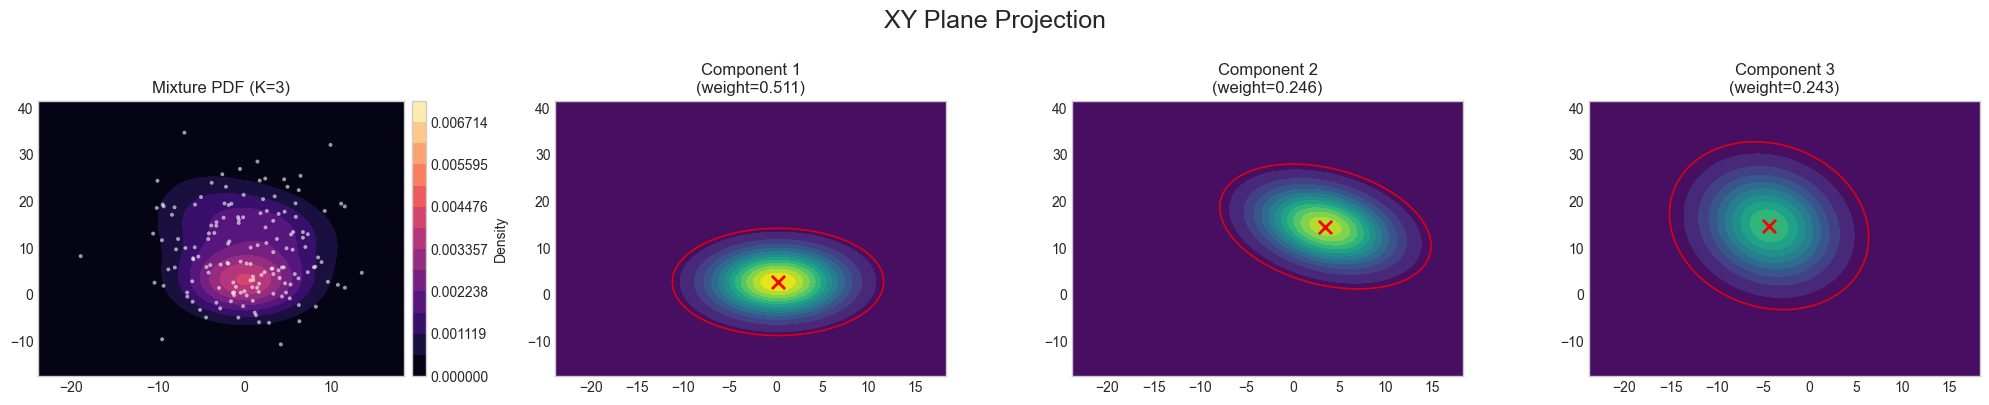

--- XZ 평면에 대한 컨투어 맵 생성 중... ---


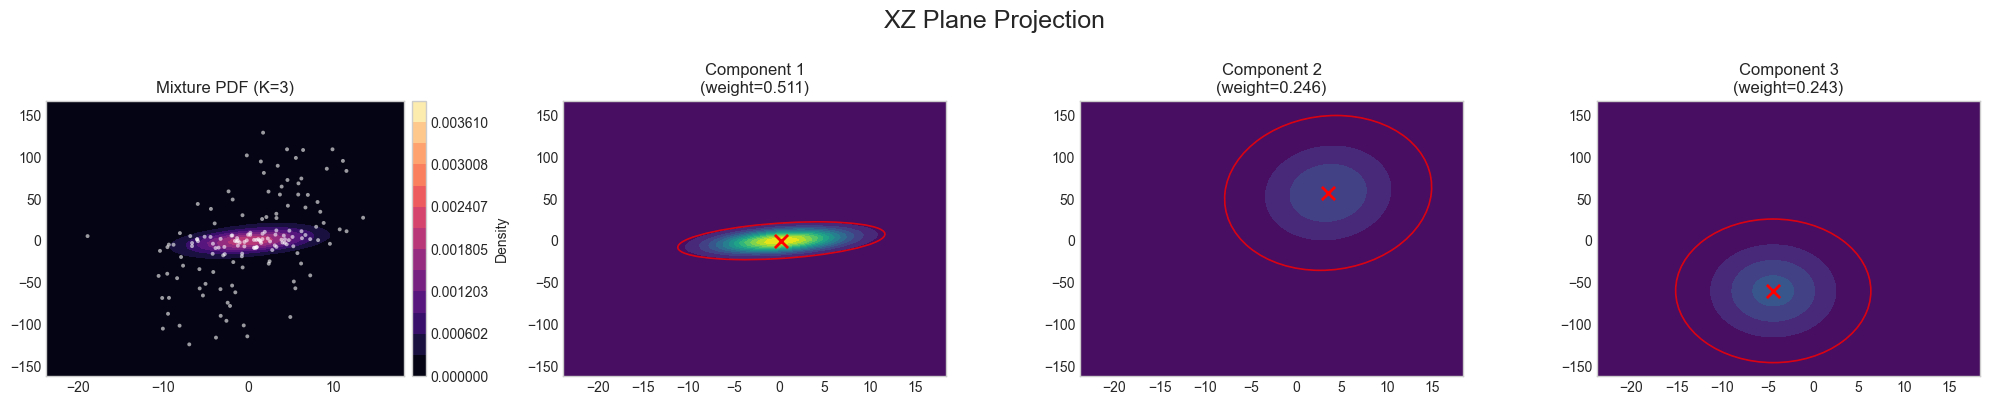

--- YZ 평면에 대한 컨투어 맵 생성 중... ---


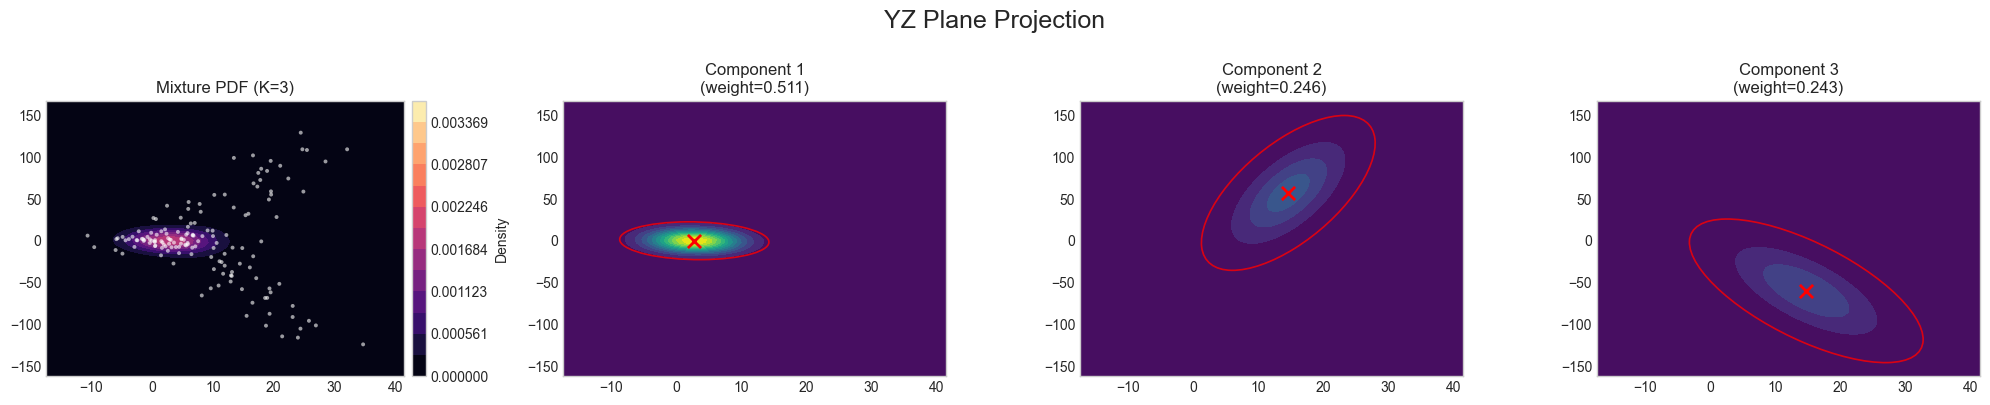

In [15]:
from matplotlib.patches import Ellipse
import math

# --- 2. 3D GMM을 2D로 투영하고 시각화하는 모듈 ---

def marginalize_gmm(gmm, dims):
    """
    3D GMM을 지정된 차원(dims)으로 투영하여 2D GMM의 파라미터를 반환합니다.
    dims: e.g., [0, 1] for XY plane
    """
    if len(dims) != 2 or max(dims) > 2 or min(dims) < 0:
        raise ValueError("dims는 [0, 1, 2]에서 2개의 고유한 차원을 선택해야 합니다.")
    
    # 평균과 공분산 행렬을 2D로 축소
    means_2d = gmm.means_[:, dims]
    covariances_2d = gmm.covariances_[:, dims, :][:, :, dims]
    return gmm.weights_, means_2d, covariances_2d

def draw_ellipse(position, covariance, ax, **kwargs):
    """주어진 위치와 공분산으로 타원을 그립니다."""
    eigenvals, eigenvecs = np.linalg.eigh(covariance)
    order = eigenvals.argsort()[::-1]
    eigenvals, eigenvecs = eigenvals[order], eigenvecs[:, order]
    
    angle = np.degrees(np.arctan2(*eigenvecs[:,0][::-1]))
    
    # 95% 신뢰구간에 해당하는 타원 크기 설정
    width, height = 2 * np.sqrt(5.991 * eigenvals)
    ellipse = Ellipse(xy=position, width=width, height=height, angle=angle, **kwargs)
    ax.add_artist(ellipse)

def gaussian_pdf_grid(grid_points, mean, cov):
    """2D 가우시안 PDF 값을 그리드 포인트에 대해 계산합니다."""
    n_points, D = grid_points.shape
    inv_cov = np.linalg.inv(cov)
    det_cov = np.linalg.det(cov)
    diff = grid_points - mean
    
    exponent = -0.5 * np.sum(diff @ inv_cov * diff, axis=1)
    coeff = 1.0 / (np.sqrt((2 * np.pi)**D * det_cov))
    
    return coeff * np.exp(exponent)

def plot_projected_contours(X_2d, weights, means_2d, covariances_2d, title, n_grid=100, margin=0.15):
    """
    2D로 투영된 GMM의 혼합 및 각 컴포넌트 PDF를 시각화합니다.
    """
    K = len(weights)
    
    # 컨투어 그리드 범위 설정
    xmin, xmax = X_2d[:, 0].min(), X_2d[:, 0].max()
    ymin, ymax = X_2d[:, 1].min(), X_2d[:, 1].max()
    xrng = xmax - xmin; yrng = ymax - ymin
    xmin -= margin * xrng; xmax += margin * xrng
    ymin -= margin * yrng; ymax += margin * yrng

    xlin = np.linspace(xmin, xmax, n_grid)
    ylin = np.linspace(ymin, ymax, n_grid)
    Xg, Yg = np.meshgrid(xlin, ylin)
    grid_points = np.column_stack([Xg.ravel(), Yg.ravel()])

    # PDF 계산
    component_pdfs = np.array([
        gaussian_pdf_grid(grid_points, means_2d[k], covariances_2d[k]).reshape(n_grid, n_grid)
        for k in range(K)
    ])
    mixture_pdf = np.tensordot(weights, component_pdfs, axes=(0, 0))

    # 레이아웃 설정
    cols = 4
    rows = math.ceil((K + 1) / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = np.array(axes).flatten()

    max_val = max(mixture_pdf.max(), component_pdfs.max())
    levels = np.linspace(0, max_val, 14)

    # 혼합 PDF 시각화 (Mixture PDF)
    ax0 = axes[0]
    cf = ax0.contourf(Xg, Yg, mixture_pdf, levels=levels, cmap='magma')
    ax0.scatter(X_2d[:,0], X_2d[:,1], s=8, c='white', alpha=0.6, edgecolors='none')
    ax0.set_title(f'Mixture PDF (K={K})') # 혼합 PDF
    fig.colorbar(cf, ax=ax0, fraction=0.045, pad=0.02).set_label('Density')

    # 각 컴포넌트 PDF 시각화
    for k in range(K):
        ax = axes[k+1]
        cfk = ax.contourf(Xg, Yg, component_pdfs[k], levels=levels, cmap='viridis')
        draw_ellipse(means_2d[k], covariances_2d[k], ax=ax, fill=False, color='red', alpha=0.8, linewidth=1.2)
        ax.scatter(means_2d[k][0], means_2d[k][1], c='red', marker='x', s=90, linewidths=2)
        ax.set_title(f'Component {k+1}\n(weight={weights[k]:.3f})') # 컴포넌트 PDF

    # 공통 축 설정 및 남는 축 제거
    for ax in axes[:K+1]:
        ax.set_xlim(xmin, xmax); ax.set_ylim(ymin, ymax)
        ax.grid(alpha=0.2)
    for j in range(K + 1, len(axes)): 
        fig.delaxes(axes[j])

    fig.suptitle(title, fontsize=18, y=1.0)
    plt.tight_layout()
    plt.savefig(f"gmm_3d_projected_contours_{title.replace(' ', '_')}.png")
    plt.show()


# --- 3. 실행: 각 평면에 대해 시각화 ---
dims_map = {'XY': [0, 1], 'XZ': [0, 2], 'YZ': [1, 2]}

for plane, dims in dims_map.items():
    print(f"--- {plane} 평면에 대한 컨투어 맵 생성 중... ---")
    
    # 3D GMM을 2D로 투영
    weights, means_2d, covs_2d = marginalize_gmm(best_model, dims)
    
    # 원본 데이터도 2D로 투영
    data_2d = data_3d[:, dims]
    
    # 시각화 함수 호출
    plot_projected_contours(data_2d, weights, means_2d, covs_2d, 
                            title=f'{plane} Plane Projection') # 평면 투영